<a href="https://colab.research.google.com/github/qurainisepty/portfolio/blob/main/prediction_of_covid_cases_in_Indonesia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

1. Data Collection

In [ ]:
df = pd.read_csv("covid_indonesia_2.csv")
df.tail(5)

,Tanggal,Kasus_harian,Total_kasus,Kasus_aktif,Sembuh_baru,Sembuh,Meninggal_baru,Meninggal_Dunia
132,2021-11-10,480,4249323,9537,531,4096194,14,143592
133,2021-11-11,435,4249758,9486,470,4096664,16,143608
134,2021-11-12,399,4250157,9305,560,4097224,20,143628
135,2021-11-13,359,4250516,9198,451,4097675,15,143643
136,2021-11-14,339,4250855,9018,503,4098178,16,143659


2. Data Preparation


In [ ]:
df.describe()

,Kasus_harian,Total_kasus,Kasus_aktif,Sembuh_baru,Sembuh,Meninggal_baru,Meninggal_Dunia
count,137.000000,1.370000e+02,137.000000,137.000000,1.370000e+02,137.000000,137.00000
mean,15128.343066,3.800636e+06,212836.240876,16188.065693,3.467221e+06,621.664234,120578.20438
std,16758.477055,6.121355e+05,201927.468029,15064.380154,7.427454e+05,614.988956,28539.47019
min,244.000000,2.203108e+06,9018.000000,451.000000,1.890287e+06,11.000000,58995.00000
25%,1053.000000,3.532567e+06,22541.000000,1946.000000,2.907920e+06,50.000000,100636.00000
50%,5436.000000,4.140634e+06,138630.000000,12474.000000,3.864848e+06,493.000000,137156.00000
75%,29745.000000,4.228552e+06,380797.000000,29794.000000,4.063295e+06,1128.000000,142716.00000
max,56757.000000,4.250855e+06,574135.000000,48832.000000,4.098178e+06,2069.000000,143659.00000


In [ ]:
df.dtypes

Tanggal            object
Kasus_harian        int64
Total_kasus         int64
Kasus_aktif         int64
Sembuh_baru         int64
Sembuh              int64
Meninggal_baru      int64
Meninggal_Dunia     int64
dtype: object

In [ ]:
#normalization of the data used
df['cases_norm'] = df['Kasus_harian'].map(lambda x: np.log(x))
df

,Tanggal,Kasus_harian,Total_kasus,Kasus_aktif,Sembuh_baru,Sembuh,Meninggal_baru,Meninggal_Dunia,cases_norm
0,2021-07-01,24836,2203108,253826,9874,1890287,504,58995,10.120049
1,2021-07-02,25830,2228938,267539,11578,1901865,539,59534,10.159292
2,2021-07-03,27913,2256851,281677,13282,1915147,493,60027,10.236848
3,2021-07-04,27233,2284084,295228,13127,1928274,555,60582,10.212185
4,2021-07-05,29745,2313829,309999,14416,1942690,558,61140,10.300416
...,...,...,...,...,...,...,...,...,...
132,2021-11-10,480,4249323,9537,531,4096194,14,143592,6.173786
133,2021-11-11,435,4249758,9486,470,4096664,16,143608,6.075346
134,2021-11-12,399,4250157,9305,560,4097224,20,143628,5.988961
135,2021-11-13,359,4250516,9198,451,4097675,15,143643,5.883322


In [ ]:
default_date = '2021-07-01'
print(f'nilai default_date adalah : {default_date}')

nilai default_date adalah : 2021-07-01


In [ ]:
date = pd.to_datetime(default_date)
df['days'] = df['Tanggal'].apply(lambda x: pd.Timedelta(pd.to_datetime(x) - date).days)
df

,Tanggal,Kasus_harian,Total_kasus,Kasus_aktif,Sembuh_baru,Sembuh,Meninggal_baru,Meninggal_Dunia,cases_norm,days
0,2021-07-01,24836,2203108,253826,9874,1890287,504,58995,10.120049,0
1,2021-07-02,25830,2228938,267539,11578,1901865,539,59534,10.159292,1
2,2021-07-03,27913,2256851,281677,13282,1915147,493,60027,10.236848,2
3,2021-07-04,27233,2284084,295228,13127,1928274,555,60582,10.212185,3
4,2021-07-05,29745,2313829,309999,14416,1942690,558,61140,10.300416,4
...,...,...,...,...,...,...,...,...,...,...
132,2021-11-10,480,4249323,9537,531,4096194,14,143592,6.173786,132
133,2021-11-11,435,4249758,9486,470,4096664,16,143608,6.075346,133
134,2021-11-12,399,4250157,9305,560,4097224,20,143628,5.988961,134
135,2021-11-13,359,4250516,9198,451,4097675,15,143643,5.883322,135


In [ ]:
fs = ['cases_norm', 'days']
df_new = df[fs]
df_new

,cases_norm,days
0,10.120049,0
1,10.159292,1
2,10.236848,2
3,10.212185,3
4,10.300416,4
...,...,...
132,6.173786,132
133,6.075346,133
134,5.988961,134
135,5.883322,135


3. Data Processing


In [ ]:
#model making
x = np.array(df_new['days']).reshape(-1,1)
y = np.array(df_new['cases_norm'])

X_train, X_test, y_train, y_test = train_test_split(x, y,
      test_size = 0.2, random_state = 42)

print(f'dimensi dari X_train : {len(X_train)}')
print(f'dimensi dari y_train : {len(y_train)}')
print(f'dimensi dari X_test : {len(X_test)}')
print(f'dimensi dari y_test : {len(y_test)}')


dimensi dari X_train : 109
dimensi dari y_train : 109
dimensi dari X_test : 28
dimensi dari y_test : 28


In [ ]:
#Polinomial Regression
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train)

lr = LinearRegression()
lr.fit(X_poly,y_train)



LinearRegression()

In [ ]:
poly_x_test = poly_reg.fit_transform(X_test)

y_pred = lr.predict(poly_x_test)
y_pred

array([ 7.06400853,  7.11426874, 10.677965  , 10.27098195,  6.11694473,
        8.84051016,  8.92145153,  6.54777542,  5.55610111,  8.02212388,
        8.06742737,  9.64095117,  8.71723935,  8.79966773, 10.11385864,
        9.74637778, 10.24005296, 10.48054546,  5.61330074,  9.23530354,
        6.0067587 , 10.88871715,  6.86048932,  9.95053943,  7.83843157,
        7.31283122, 10.56664085, 10.50949176])

In [ ]:
#Model Evaluation
r2 = metrics.r2_score(y_test, y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
R2 score is 0.9576332489268025


In [ ]:
predict_date = np.arange(137,167).reshape(-1,1)
predict_date

array([[137],
       [138],
       [139],
       [140],
       [141],
       [142],
       [143],
       [144],
       [145],
       [146],
       [147],
       [148],
       [149],
       [150],
       [151],
       [152],
       [153],
       [154],
       [155],
       [156],
       [157],
       [158],
       [159],
       [160],
       [161],
       [162],
       [163],
       [164],
       [165],
       [166]])

In [ ]:
#Daily case prediction of covid with polynomial regression
poly_predict_date = poly_reg.fit_transform(predict_date)

predict_cases = lr.predict(poly_predict_date)
predict_cases

array([5.32482425, 5.26638545, 5.20769881, 5.14876433, 5.08958201,
       5.03015186, 4.97047388, 4.91054805, 4.8503744 , 4.7899529 ,
       4.72928357, 4.6683664 , 4.6072014 , 4.54578856, 4.48412788,
       4.42221937, 4.36006302, 4.29765884, 4.23500682, 4.17210696,
       4.10895927, 4.04556374, 3.98192037, 3.91802917, 3.85389013,
       3.78950326, 3.72486855, 3.659986  , 3.59485562, 3.5294774 ])

4. Data Analysis

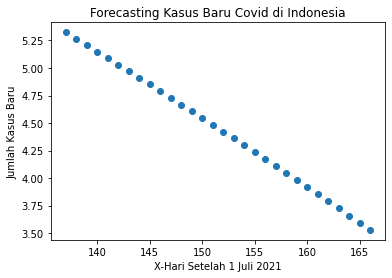

In [ ]:
plt.scatter(predict_date, predict_cases)
plt.title('Forecasting Kasus Baru Covid di Indonesia')
plt.xlabel('X-Hari Setelah 1 Juli 2021')
plt.ylabel('Jumlah Kasus Baru')
plt.show;

In [ ]:
Insight:
1. tentang grafik prediksi
Grafik prediksi menunjukkan trend turun yang artinya dengan asumsi tidak adanya outbreak mendadak dan masuknya varian baru maka prediksi kasus baru Covid di Indonesia pada 15 November 2021 hingga 14 Desember 2021 terus mengalami penurunan.
Pada tanggal 14 Desember 2021 atau hari ke-166, logaritma natural dari jumlah kasus baru adalah sebesar 3.5294774, yang artinya jumlah kasus baru pada hari ke-166 adalah sebesar e^(3.5294774) atau sebesar 34 kasus. 
Ini menunjukkan bahwa penurunan kasus baru Covid di Indonesia pada tanggal 14 Desember 2021 turun signifikan dibandingkan pada kasus baru ditanggal 14 November 2021 dengan selisih kasus sebanyak 305 kasus atau 90% penurunan.

2. tentang pemilihan polynomial regression dan model secara umum
Polynomial regression dipilih karena polynomial regression mampu memodelkan data lebih baik yang mana model yang terbentuk akan lebih fit dengan data sehingga performa model akan baik dan residu dari model lebih kecil jika dibandingkan regresi linear sederhana (linear regression).
Model yang digunakan dalam polynomial regression secara umum adalah y = b0 + b1.x1+ b2.x1^2 +...+ bn.x1^n  
Model yang terbentuk adalah menghasilkan tren turun untuk prediksi data kasus baru covid di Indonesia. Pada pemodelan kasus baru Covid di Indonesia dengan polynomial regression menghasilkan nilai R2 sebesar 0.9576 artinya performa model sebesar 95.76% yang mana sangat baik karena mendekati 100%.
